In [3]:
import sys
import pandas as pd
import numpy as np

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

from ppandas import PDataFrame

e:\Research\ppandas


c:\Users\Amy\anaconda3\envs\ppandas-py38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data Processing

### Toronto Election Study (TES)


Create a DataFrame using the TES dataset columns of Age, Ward, and mayoral candidate preference. The TES dataset can be found [here](http://www.torontoelectionstudy.com/data).

In [4]:
TES_df  = pd.read_stata('Toronto+Election+Study.dta')[['AGE','CPS5','CPS9']]
TES_df.head()

,AGE,CPS5,CPS9
0,68.0,Ward 23 Willowdale (Current Councillor: John F...,John Tory
1,65.0,Ward 13 Parkdale-High Park (Current Councillor...,John Tory
2,65.0,Ward 35 Scarborough Southwest (Current Council...,Don't know or haven't decided
3,68.0,Ward 13 Parkdale-High Park (Current Councillor...,John Tory
4,49.0,Ward 9 York Centre (Current Councillor: Maria ...,Other


There are 3000 respondents in the TES dataset

In [5]:
TES_df.describe()

,AGE
count,3000.0000
mean,50.0060
std,15.4017
min,18.0000
25%,37.0000
50%,50.0000
75%,62.0000
max,114.0000




*   Convert the Age attribute into bins: (17,23], (23,28),...,(63,114]
*   Rename DataFrame columns to and convert them to type string




In [6]:
# Age
age_values = [17,23,28,33,38,43,48,53,58,63,114]
TES_df['AGE'] = pd.cut(TES_df['AGE'],age_values)
TES_df.astype({'AGE': str})

# Ward
TES_df.CPS5 = TES_df['CPS5'].str.replace(r"[\D]",'', regex=True)
TES_df.rename({'CPS5':'WARD44'},axis=1, inplace=True)
TES_df = TES_df[TES_df['WARD44'] !='']

# Candidate Vote - before election who they were leaning towards
mapDict = {'Doug Ford':'Doug Ford', 'Olivia Chow':'Olivia Chow', 'John Tory':'John Tory', 'Other':'Other', "Don't know or haven't decided": 'Unknown'}
TES_df.CPS9=TES_df.CPS9.map(mapDict)
TES_df.rename({'CPS9':'VOTE'},axis=1, inplace=True)
TES_df = TES_df[TES_df['VOTE'] !='Unknown']

### Census

Create two dataframes that contain Toronto's census population breakdown by Age bin and by Ward. This data can be found [here](https://open.toronto.ca/dataset/ward-profiles-2014-2018-wards/)

In [7]:
age_marginal_df = pd.read_csv('census2011_age.csv')
print(age_marginal_df)
ward_marginal_df = pd.read_csv('census2011_ward.csv', dtype={'WARD44': str})
print(ward_marginal_df)

         AGE  Unnamed: 1
0    [17,19]    0.042431
1    [20,24]    0.085112
2    [25,29]    0.098280
3    [30,34]    0.093321
4    [35,39]    0.088327
5    [40,44]    0.091572
6    [45,49]    0.096310
7    [50,54]    0.088740
8    [55,59]    0.075400
9    [60,64]    0.065394
10  [65,114]    0.175115
   WARD44  2011Census %
0       1      0.023447
1       2      0.021691
2       3      0.019973
3       4      0.020894
4       5      0.024479
5       6      0.022559
6       7      0.019917
7       8      0.019250
8       9      0.017606
9      10      0.024791
10     11      0.023856
11     12      0.020651
12     13      0.020370
13     14      0.020560
14     15      0.023728
15     16      0.020644
16     17      0.019315
17     18      0.017196
18     19      0.021888
19     20      0.029292
20     21      0.018600
21     22      0.025053
22     23      0.033817
23     24      0.023844
24     25      0.022299
25     26      0.024821
26     27      0.030083
27     28      0.025462
28  

# ppandas Analysis

Create TES PDataFrame where independent nodes are Age and Ward and the dependent nodes are the ones not specified as independent nodes, which is Vote

In [8]:
TES_pdf = PDataFrame(independent_vars = ['AGE','WARD44'], data =  TES_df)
# TES_pdf.visualise(show_tables=True)

In [9]:
TES_pdf.bayes_net.get_cpds()

[<TabularCPD representing P(AGE:10) at 0x1be2c6252b0>,
 <TabularCPD representing P(WARD44:44) at 0x1be2c614550>,
 <TabularCPD representing P(VOTE:4 | AGE:10, WARD44:44) at 0x1be2c614760>]

In [10]:
print(TES_pdf.bayes_net.get_cpds('AGE'))
print(TES_pdf.bayes_net.get_cpds('WARD44'))
print(TES_pdf.bayes_net.get_cpds('VOTE'))

+----------------+-----------+
| AGE((17, 23])  | 0.0183946 |
+----------------+-----------+
| AGE((23, 28])  | 0.0535117 |
+----------------+-----------+
| AGE((28, 33])  | 0.0890468 |
+----------------+-----------+
| AGE((33, 38])  | 0.0898829 |
+----------------+-----------+
| AGE((38, 43])  | 0.0794314 |
+----------------+-----------+
| AGE((43, 48])  | 0.0957358 |
+----------------+-----------+
| AGE((48, 53])  | 0.0961538 |
+----------------+-----------+
| AGE((53, 58])  | 0.116221  |
+----------------+-----------+
| AGE((58, 63])  | 0.117475  |
+----------------+-----------+
| AGE((63, 114]) | 0.244147  |
+----------------+-----------+
+------------+------------+
| WARD44(1)  | 0.014214   |
+------------+------------+
| WARD44(10) | 0.0259197  |
+------------+------------+
| WARD44(11) | 0.0188127  |
+------------+------------+
| WARD44(12) | 0.00752508 |
+------------+------------+
| WARD44(13) | 0.0250836  |
+------------+------------+
| WARD44(14) | 0.0192308  |
+------------

Create PDataFrames using the Toronto Census Age and Ward DataFrames. Since these DataFrames are aggregate-level (each row is not an individual sample), use the ".from_populational_data" method and provide the total number of participants in the census using the "num_of_records" argument.

          Unnamed: 1
AGE                 
[17,19]     0.042431
[20,24]     0.085112
[25,29]     0.098280
[30,34]     0.093321
[35,39]     0.088327
[40,44]     0.091572
[45,49]     0.096310
[50,54]     0.088740
[55,59]     0.075400
[60,64]     0.065394
[65,114]    0.175115


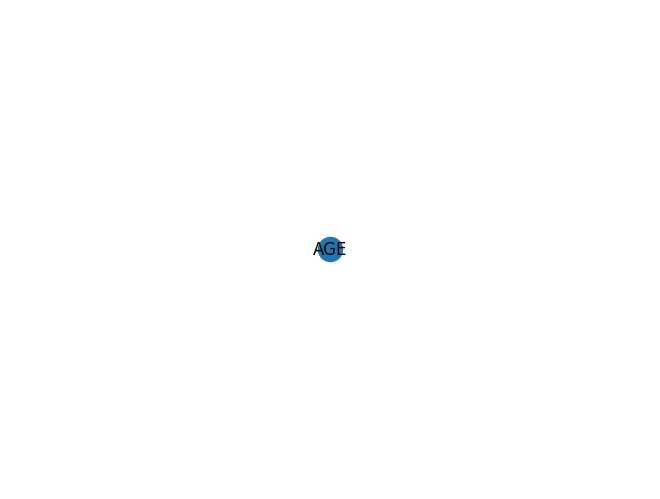

+---------------+-----------+
| AGE([17,19])  | 0.0424309 |
+---------------+-----------+
| AGE([20,24])  | 0.0851118 |
+---------------+-----------+
| AGE([25,29])  | 0.0982798 |
+---------------+-----------+
| AGE([30,34])  | 0.0933208 |
+---------------+-----------+
| AGE([35,39])  | 0.0883268 |
+---------------+-----------+
| AGE([40,44])  | 0.0915718 |
+---------------+-----------+
| AGE([45,49])  | 0.0963098 |
+---------------+-----------+
| AGE([50,54])  | 0.0887398 |
+---------------+-----------+
| AGE([55,59])  | 0.0753998 |
+---------------+-----------+
| AGE([60,64])  | 0.0653939 |
+---------------+-----------+
| AGE([65,114]) | 0.175115  |
+---------------+-----------+
        2011Census %
WARD44              
1           0.023447
10          0.024791
11          0.023856
12          0.020651
13          0.020370
14          0.020560
15          0.023728
16          0.020644
17          0.019315
18          0.017196
19          0.021888
2           0.021691
20          0.02

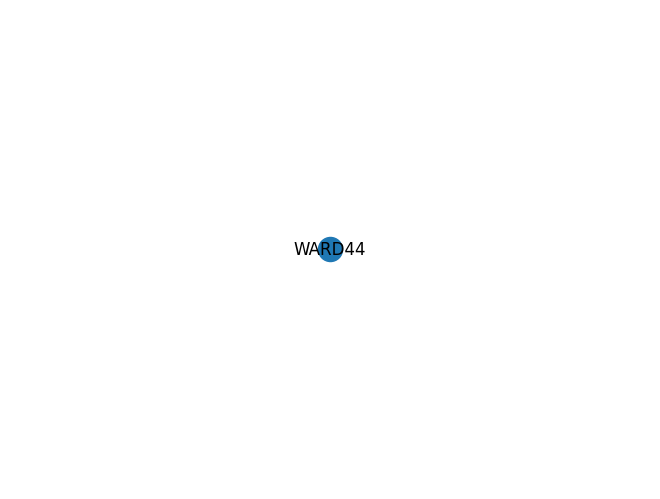

In [11]:
age_marginal_pdf = PDataFrame.from_populational_data(independent_vars =["AGE"],data = age_marginal_df, num_of_records=2615090)
age_marginal_pdf.visualise(show_tables=True)
ward_marginal_pdf = PDataFrame.from_populational_data(["WARD44"],ward_marginal_df,2615090)
ward_marginal_pdf.visualise()

Replace TES marginal distributions of Age and Ward with census distributions by performing a two pjoins. 

The first pjoin uses "age_marginal_pdf" as the reference model for the independent variable Age. Since there is numerical mismatch between how TES represents Age and how the census represents Age ([17,19],[20,24],...,[65,114]) the "mismatches" argument is used where a dictionary is passed. The dictionary key is the name of the variable exhibiting mismatch and the value is the type of mismatch. To handle this numerical mismatch, a cross product between the two Age representations is computed. Therefore the resulting join_pdf has the census's marginal distribution for Age, the TES's marginal distribution for Ward and TES's conditional probability distribution P(Vote|Age, Ward).

The second pjoin uses "ward_marginal_pdf" as the reference model for the independent variable Ward. Therefore the resulting join_pdf has the census's marginal distribution for Age and Ward and the TES's conditional probability distribution P(Vote|Age,Ward).

In [12]:
print(age_marginal_pdf.bayes_net.get_cpds(node='AGE'))

+---------------+-----------+
| AGE([17,19])  | 0.0424309 |
+---------------+-----------+
| AGE([20,24])  | 0.0851118 |
+---------------+-----------+
| AGE([25,29])  | 0.0982798 |
+---------------+-----------+
| AGE([30,34])  | 0.0933208 |
+---------------+-----------+
| AGE([35,39])  | 0.0883268 |
+---------------+-----------+
| AGE([40,44])  | 0.0915718 |
+---------------+-----------+
| AGE([45,49])  | 0.0963098 |
+---------------+-----------+
| AGE([50,54])  | 0.0887398 |
+---------------+-----------+
| AGE([55,59])  | 0.0753998 |
+---------------+-----------+
| AGE([60,64])  | 0.0653939 |
+---------------+-----------+
| AGE([65,114]) | 0.175115  |
+---------------+-----------+


In [13]:
print(TES_pdf.bayes_net.get_cpds(node='AGE'))

+----------------+-----------+
| AGE((17, 23])  | 0.0183946 |
+----------------+-----------+
| AGE((23, 28])  | 0.0535117 |
+----------------+-----------+
| AGE((28, 33])  | 0.0890468 |
+----------------+-----------+
| AGE((33, 38])  | 0.0898829 |
+----------------+-----------+
| AGE((38, 43])  | 0.0794314 |
+----------------+-----------+
| AGE((43, 48])  | 0.0957358 |
+----------------+-----------+
| AGE((48, 53])  | 0.0961538 |
+----------------+-----------+
| AGE((53, 58])  | 0.116221  |
+----------------+-----------+
| AGE((58, 63])  | 0.117475  |
+----------------+-----------+
| AGE((63, 114]) | 0.244147  |
+----------------+-----------+


In [14]:
join_pdf = age_marginal_pdf.pjoin(TES_pdf,mismatches={"AGE":'numerical'})
print(join_pdf.bayes_net.get_cpds(node='AGE'))
print(join_pdf.bayes_net.get_cpds(node='WARD44'))
print(join_pdf.bayes_net.get_cpds(node='VOTE'))

+---------------+-----------+
| AGE((17,19])  | 0.0424309 |
+---------------+-----------+
| AGE([20,23])  | 0.0638339 |
+---------------+-----------+
| AGE((23,24])  | 0.021278  |
+---------------+-----------+
| AGE([25,28])  | 0.0737099 |
+---------------+-----------+
| AGE((28,29])  | 0.02457   |
+---------------+-----------+
| AGE([30,33])  | 0.0699906 |
+---------------+-----------+
| AGE((33,34])  | 0.0233302 |
+---------------+-----------+
| AGE([35,38])  | 0.0662451 |
+---------------+-----------+
| AGE((38,39])  | 0.0220817 |
+---------------+-----------+
| AGE([40,43])  | 0.0686789 |
+---------------+-----------+
| AGE((43,44])  | 0.022893  |
+---------------+-----------+
| AGE([45,48])  | 0.0722324 |
+---------------+-----------+
| AGE((48,49])  | 0.0240775 |
+---------------+-----------+
| AGE([50,53])  | 0.0665549 |
+---------------+-----------+
| AGE((53,54])  | 0.022185  |
+---------------+-----------+
| AGE([55,58])  | 0.0565499 |
+---------------+-----------+
| AGE((58,

In [15]:
join_pdf = ward_marginal_pdf.pjoin(join_pdf)
# join_pdf.visualise(show_tables=True)
join_pdf.bayes_net.get_cpds()

[<TabularCPD representing P(AGE:20) at 0x1be2c62b100>,
 <TabularCPD representing P(WARD44:44) at 0x1be2c641c40>,
 <TabularCPD representing P(VOTE:4 | AGE:20, WARD44:44) at 0x1be2c62bf10>]

In [22]:
join_pdf.bayes_net.get_cpds(node='VOTE').to_csv('tmp.csv')

Perform Variable Elimination to query P(Vote)

In [17]:
print('ppandas 2011 Census + TES(n = {}):'.format(join_pdf.num_of_records))
queryResults= join_pdf.query(['VOTE'])
print(queryResults)

ppandas 2011 Census + TES(n = 5232572):
          VOTE  Probability(VOTE)
0    Doug Ford           0.287157
1    John Tory           0.434925
2  Olivia Chow           0.247064
3        Other           0.030854
